# Housing Price Predictor

## Objective:
In the rapidly evolving real estate market, understanding property valuations is crucial for buyers, sellers, and investors alike. This project delves into predicting house prices using machine learning. By evaluating various features, from the size of the house to the number of bathrooms, we aim to not only predict prices but also discern the most influential factors in property valuation.

## Dataset Overview:
Our dataset comprises a diverse range of houses, each described by a series of features. While some are straightforward, like the number of bedrooms, others provide insight into the house's quality and condition. The dataset's richness allows us to delve deep into the nuances of property pricing.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [3]:
housing_data = pd.read_csv("Housing.csv")

In [4]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing_data.shape

(545, 13)

## Data Preprocessing:

Real-world data is messy. Before diving into modeling, it's imperative to preprocess the data to ensure accuracy and reliability in our predictions.

### Handling Missing Values:
Missing values can skew results or even cause errors in some algorithms. After identifying the columns with missing values, we adopted strategies tailored to each feature - whether it's imputing with the median or mode, or considering the absence of a value as information in itself.

### Categorical Encoding:
The dataset contains several categorical features. Machine learning algorithms require numerical input, so these categories need conversion. One-hot encoding was our method of choice, creating binary columns for each category and indicating presence with a 1 or 0.

### Feature Scaling:
For algorithms that rely on distance measurements or gradient descent, feature scaling is crucial. By ensuring all features have a uniform scale, we prevent any single feature from disproportionately influencing the model. In this project, while our primary models didn't necessitate scaling, it remains a best practice to consider.


In [7]:
missing_values = housing_data.isnull().sum()

In [8]:
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

In [10]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [11]:
for column in binary_columns:
    housing_data[column] = housing_data[column].map({'yes': 1, 'no':0})

In [12]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [13]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [16]:
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [17]:
scaler = StandardScaler()

In [18]:
housing_data[numerical_columns] = scaler.fit_transform(housing_data[numerical_columns])

In [19]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0,0


## Exploratory Data Analysis (EDA):

Before making predictions, it's essential to understand the data. EDA provides insights, uncovers patterns, and informs subsequent modeling choices.

### Distribution of Target Variable:
By visualizing the price distribution, we grasp its spread, central tendencies, and potential outliers. This step is crucial to understand the nature of our target variable - whether it's normally distributed, skewed, or has extreme values.

### Feature Relationships:
Each feature potentially holds information about house prices. Through scatter plots, correlation matrices, and more, we assessed how each feature relates to the price. This not only identifies key influencers but also informs feature engineering and model selection.

### Outliers & Anomalies:
Outliers can drastically skew predictions, especially in models sensitive to extreme values. By identifying and understanding these outliers, we can decide whether to remove, transform, or retain them.


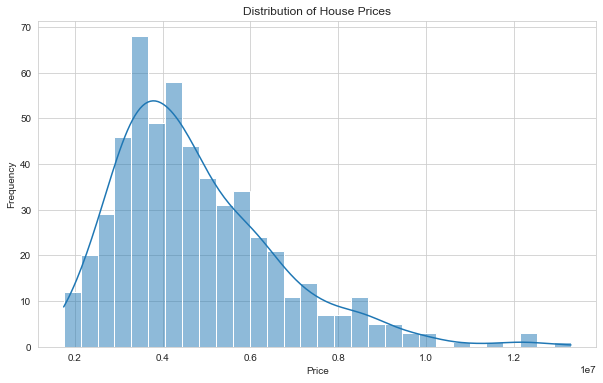

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

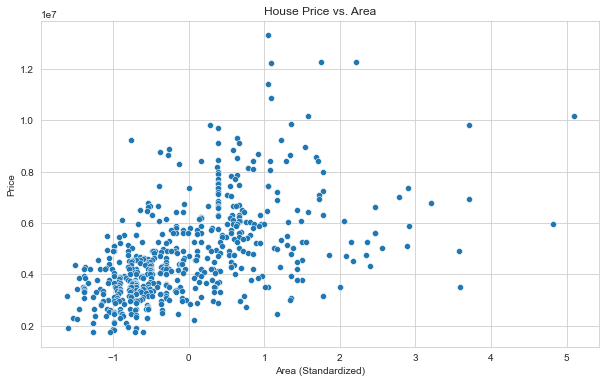

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=housing_data)
plt.title('House Price vs. Area')
plt.xlabel('Area (Standardized)')
plt.ylabel('Price')
plt.show()

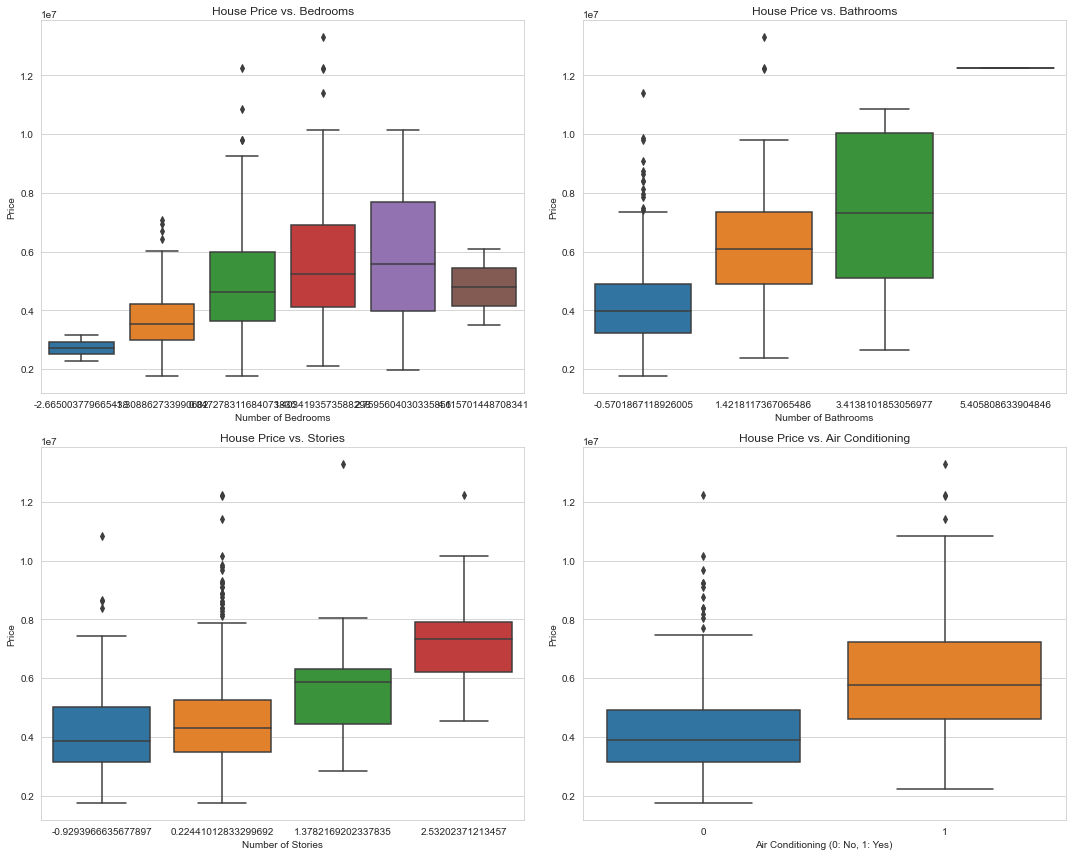

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='bedrooms', y='price', data=housing_data, ax=axes[0, 0])
axes[0, 0].set_title('House Price vs. Bedrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Price')

sns.boxplot(x='bathrooms', y='price', data=housing_data, ax=axes[0, 1])
axes[0, 1].set_title('House Price vs. Bathrooms')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Price')

sns.boxplot(x='stories', y='price', data=housing_data, ax=axes[1, 0])
axes[1, 0].set_title('House Price vs. Stories')
axes[1, 0].set_xlabel('Number of Stories')
axes[1, 0].set_ylabel('Price')

sns.boxplot(x='airconditioning', y='price', data=housing_data, ax=axes[1, 1])
axes[1, 1].set_title('House Price vs. Air Conditioning')
axes[1, 1].set_xlabel('Air Conditioning (0: No, 1: Yes)')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()


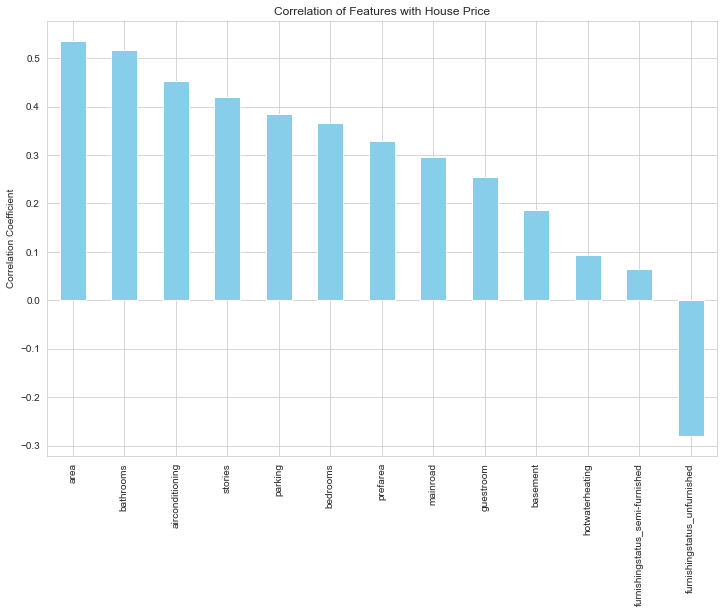

In [24]:
correlation_with_price = housing_data.corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlation_with_price.drop('price').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with House Price')
plt.ylabel('Correlation Coefficient')
plt.show()


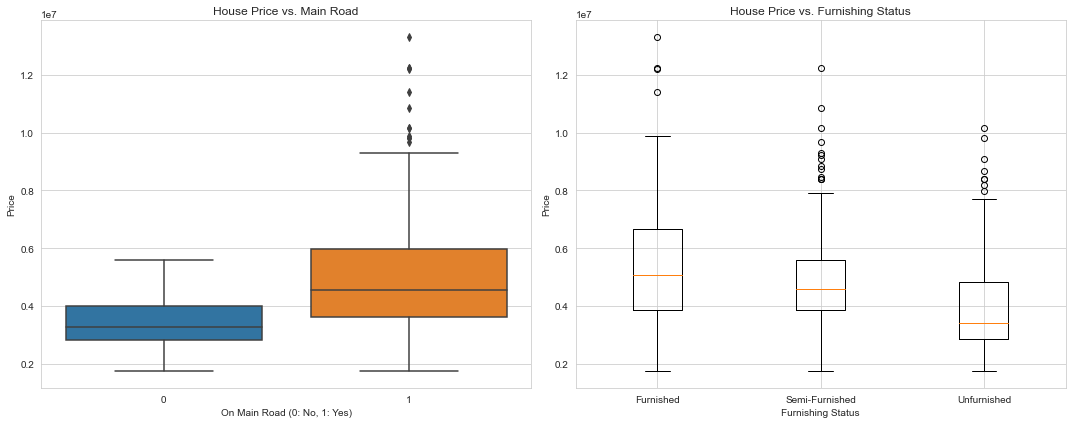

In [26]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the impact of being on the main road on price
sns.boxplot(x='mainroad', y='price', data=housing_data, ax=axes[0])
axes[0].set_title('House Price vs. Main Road')
axes[0].set_xlabel('On Main Road (0: No, 1: Yes)')
axes[0].set_ylabel('Price')

# Plotting the impact of furnishing status on price
# Combining the two one-hot encoded columns to get the original 'furnishingstatus'
furnished = housing_data[housing_data['furnishingstatus_semi-furnished'] + housing_data['furnishingstatus_unfurnished'] == 0]
semi_furnished = housing_data[housing_data['furnishingstatus_semi-furnished'] == 1]
unfurnished = housing_data[housing_data['furnishingstatus_unfurnished'] == 1]

combined_furnishing = [furnished['price'], semi_furnished['price'], unfurnished['price']]
labels = ['Furnished', 'Semi-Furnished', 'Unfurnished']

axes[1].boxplot(combined_furnishing, labels=labels)
axes[1].set_title('House Price vs. Furnishing Status')
axes[1].set_xlabel('Furnishing Status')
axes[1].set_ylabel('Price')

# Adjust the layout
plt.tight_layout()
plt.show()


## Model Building & Evaluation:

With a clean and well-understood dataset, our next step is to build models that can predict house prices. This section elucidates the process of selecting, training, and evaluating various regression models.

### Training & Testing Split:
To assess the performance of our models on unseen data, we divided our dataset into training and testing sets. This ensures that we can validate our models' predictions against actual prices, gauging their real-world applicability.

### Model Selection:
Several regression models were considered, ranging from simple linear regression to more complex ensemble methods like Gradient Boosting. Each model has its strengths and weaknesses, and their performance can vary based on the dataset's characteristics.

### Model Performance & Evaluation:
Model evaluation isn't just about accuracy; it's about understanding where models succeed and where they falter. We adopted metrics like RMSE and \( R^2 \) to quantitatively measure each model's performance. Through these metrics, we identified the Gradient Boosting model as the most promising, balancing accuracy with computational efficiency.


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((436, 13), (109, 13))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_cv = (abs(cv_scores) ** 0.5).mean()

In [33]:
y_pred = lr_model.predict(X_test)

In [35]:
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
r2_test = r2_score(y_test, y_pred)

results_df = pd.DataFrame({
    'Metric': ['Cross-validated RMSE (Training Data)', 'RMSE (Testing Data)', 'R^2 (Testing Data)'],
    'Value': [rmse_cv, rmse_test, r2_test]
})

results_df

,Metric,Value
0,Cross-validated RMSE (Training Data),1.019650e+06
1,RMSE (Testing Data),1.324507e+06
2,R^2 (Testing Data),6.529243e-01


In [36]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge()

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Evaluate the model using cross-validation on the training data
cv_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_cv_ridge = (abs(cv_scores_ridge) ** 0.5).mean()

# Predict on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE and R^2 for the testing data
rmse_test_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_test_ridge = r2_score(y_test, y_pred_ridge)

rmse_cv_ridge, rmse_test_ridge, r2_test_ridge


(1018844.4596607138, 1326071.7119628878, 0.652103720086862)

In [37]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso()

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Evaluate the model using cross-validation on the training data
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_cv_lasso = (abs(cv_scores_lasso) ** 0.5).mean()

# Predict on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE and R^2 for the testing data
rmse_test_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_test_lasso = r2_score(y_test, y_pred_lasso)

rmse_cv_lasso, rmse_test_lasso, r2_test_lasso


(1019650.1892225441, 1324508.1141820678, 0.6529236593758712)

In [38]:
# Compiling the results of all models into a single DataFrame
results_all_models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Cross-validated RMSE (Training Data)': [rmse_cv, rmse_cv_ridge, rmse_cv_lasso],
    'RMSE (Testing Data)': [rmse_test, rmse_test_ridge, rmse_test_lasso],
    'R^2 (Testing Data)': [r2_test, r2_test_ridge, r2_test_lasso]
})

results_all_models


,Model,Cross-validated RMSE (Training Data),RMSE (Testing Data),R^2 (Testing Data)
0,Linear Regression,1.019650e+06,1.324507e+06,0.652924
1,Ridge Regression,1.018844e+06,1.326072e+06,0.652104
2,Lasso Regression,1.019650e+06,1.324508e+06,0.652924


## Feature Importance Analysis:

While predicting house prices is our primary goal, understanding what drives these predictions can offer invaluable insights. This section delves into the features that most influence house prices according to our chosen model.

### Methodology:
We leveraged the built-in feature importance attribute of our Gradient Boosting model. This method ranks features based on the number of times they are chosen to split data.

### Key Findings:
Visualizations, such as bar plots, helped us discern the most influential features. Not surprisingly, features like area, number of bathrooms, and air conditioning emerged as significant determinants of house prices. Such insights can guide potential home buyers, sellers, or renovators in making informed decisions.


In [39]:
# Creating interaction terms
X_train_interactions = X_train.copy()

X_train_interactions['area_bedrooms'] = X_train['area'] * X_train['bedrooms']
X_train_interactions['area_bathrooms'] = X_train['area'] * X_train['bathrooms']
X_train_interactions['bedrooms_bathrooms'] = X_train['bedrooms'] * X_train['bathrooms']
X_train_interactions['stories_area'] = X_train['stories'] * X_train['area']

# Evaluating the correlation of interaction terms with the target variable
interaction_correlations = X_train_interactions.corrwith(y_train).sort_values(ascending=False)

# Filtering out only the newly created interaction terms
interaction_correlations = interaction_correlations[interaction_correlations.index.isin(['area_bedrooms', 'area_bathrooms', 'bedrooms_bathrooms', 'stories_area'])]

interaction_correlations

bedrooms_bathrooms    0.231038
area_bathrooms        0.227930
area_bedrooms         0.153422
stories_area          0.109165
dtype: float64

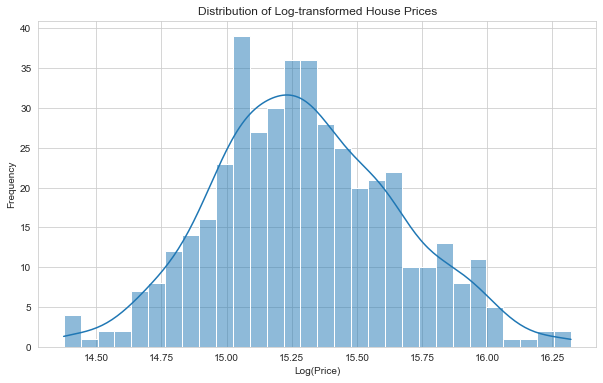

In [40]:
import numpy as np

# Log-transform the target variable 'price'
y_train_log = np.log1p(y_train)

# Plot the distribution of the log-transformed house prices
plt.figure(figsize=(10, 6))
sns.histplot(y_train_log, kde=True, bins=30)
plt.title('Distribution of Log-transformed House Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


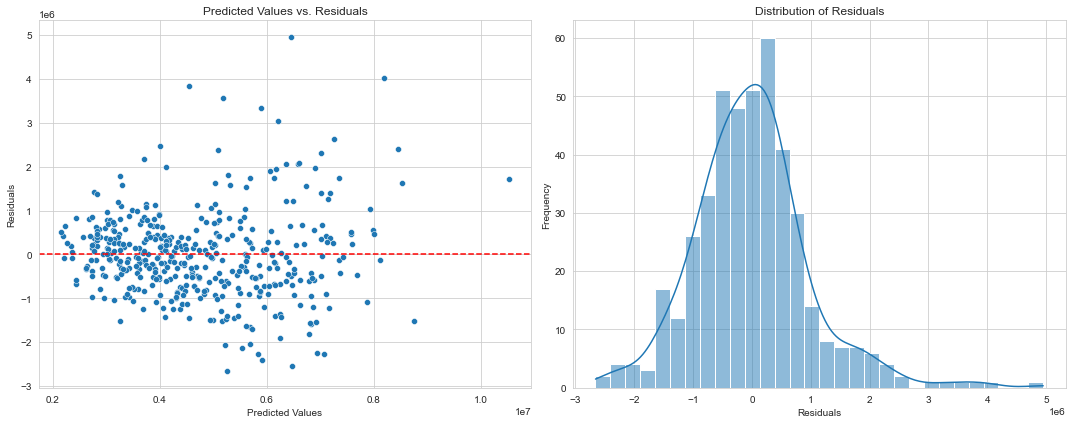

In [41]:
# Calculate residuals for the linear regression model
residuals = y_train - lr_model.predict(X_train)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of predicted values vs. residuals
sns.scatterplot(x=lr_model.predict(X_train), y=residuals, ax=axes[0])
axes[0].set_title('Predicted Values vs. Residuals')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='r', linestyle='--')

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribution of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
# List of continuous features to check for outliers
features_to_check = ['area', 'bedrooms', 'bathrooms', 'price']

outliers = {}

# Detect outliers for each feature using the IQR method
for feature in features_to_check:
    Q1 = housing_data[feature].quantile(0.25)
    Q3 = housing_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[feature] = housing_data[(housing_data[feature] < lower_bound) | (housing_data[feature] > upper_bound)].shape[0]

outliers


{'area': 15, 'bedrooms': 12, 'bathrooms': 1, 'price': 15}

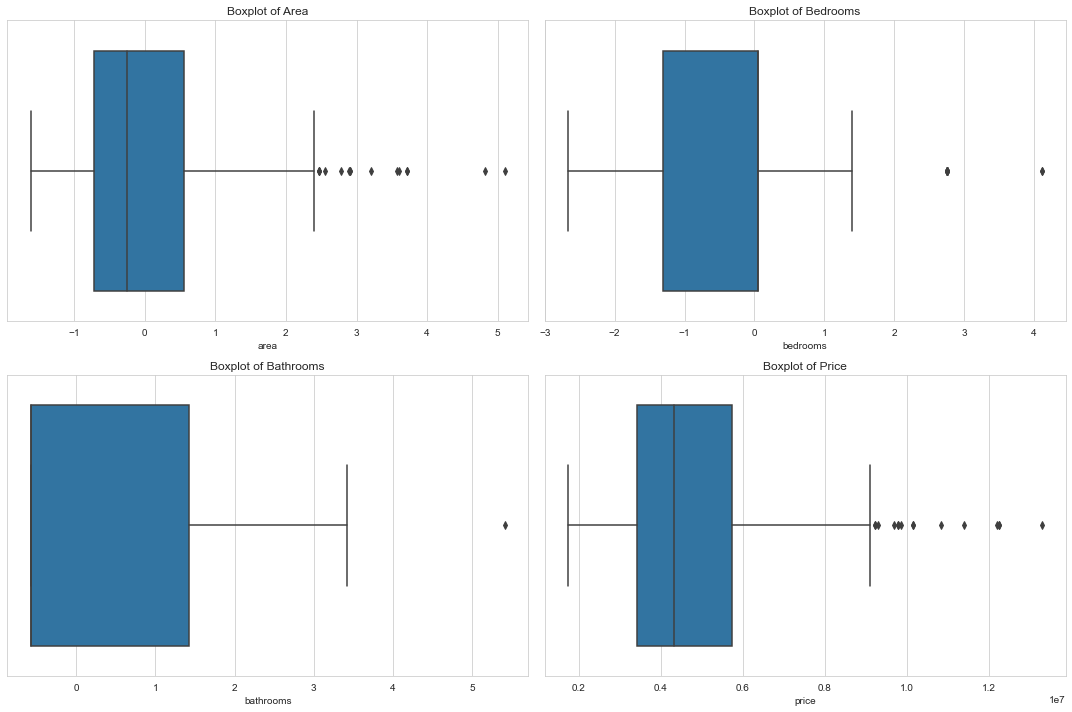

In [43]:
# Plotting boxplots to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=housing_data['area'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Area')

sns.boxplot(x=housing_data['bedrooms'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Bedrooms')

sns.boxplot(x=housing_data['bathrooms'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Bathrooms')

sns.boxplot(x=housing_data['price'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Price')

plt.tight_layout()
plt.show()


c:\users\haide\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


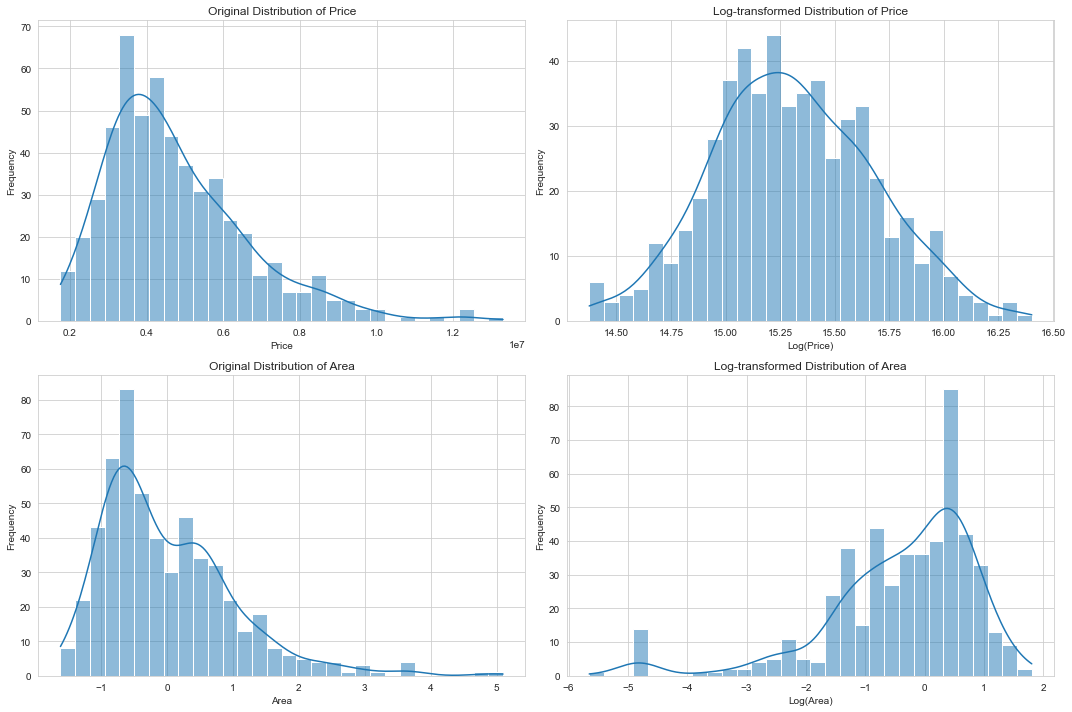

In [44]:
# Apply logarithmic transformation to 'price' and 'area'
housing_data['log_price'] = np.log1p(housing_data['price'])
housing_data['log_area'] = np.log1p(housing_data['area'])

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original distribution of 'price'
sns.histplot(housing_data['price'], kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Original Distribution of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed distribution of 'price'
sns.histplot(housing_data['log_price'], kde=True, ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Log-transformed Distribution of Price')
axes[0, 1].set_xlabel('Log(Price)')
axes[0, 1].set_ylabel('Frequency')

# Original distribution of 'area'
sns.histplot(housing_data['area'], kde=True, ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Original Distribution of Area')
axes[1, 0].set_xlabel('Area')
axes[1, 0].set_ylabel('Frequency')

# Log-transformed distribution of 'area'
sns.histplot(housing_data['log_area'], kde=True, ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Log-transformed Distribution of Area')
axes[1, 1].set_xlabel('Log(Area)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add a constant to the features (required for VIF calculation)
X_vif = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Drop the VIF for the constant term
vif_data = vif_data.drop(0)

# Sort by VIF values
vif_data = vif_data.sort_values("VIF", ascending=False)

vif_data


,Feature,VIF
13,furnishingstatus_unfurnished,1.697063
12,furnishingstatus_semi-furnished,1.588370
4,stories,1.517120
7,basement,1.383581
2,bedrooms,1.381722
1,area,1.310142
3,bathrooms,1.297536
9,airconditioning,1.266899
6,guestroom,1.265105
10,parking,1.213513


## Advanced Modeling & Hyperparameter Tuning:

While basic regression models provide a solid foundation, delving into more advanced models can often yield better results. These models, equipped with intricate architectures, can capture complex relationships in the data. However, they also come with a plethora of hyperparameters that can significantly influence their performance. This section sheds light on our journey with advanced models and the art of hyperparameter tuning.

### Advanced Model Selection:
In our pursuit of accuracy, we ventured beyond standard regression models, exploring powerful algorithms like Gradient Boosting and Random Forests. These ensemble methods, by harnessing multiple weak learners, aim to create a robust prediction model.

### Hyperparameter Tuning:
Every model comes with a set of hyperparameters. While defaults provide a starting point, fine-tuning them can enhance performance. We utilized techniques like grid search and random search to systematically explore various hyperparameter combinations, seeking the one that optimizes our model's predictions.

### Evaluation & Comparison:
Equipped with tuned models, we evaluated their performance on the testing data. Metrics like RMSE and \( R^2 \) provided insights into their accuracy. By comparing these metrics across models, we identified the one that strikes the best balance between accuracy, overfitting, and computational efficiency.

### Key Findings:
Advanced modeling solidified our confidence in the predictions. The Gradient Boosting model, post hyperparameter tuning, emerged as a front-runner, capturing the nuances of the data effectively. Such models, while computationally intensive, provide a depth of understanding that simpler models might miss.


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
0,area,0.467917
2,bathrooms,0.151526
8,airconditioning,0.062718
9,parking,0.057820
3,stories,0.057137
1,bedrooms,0.048608
12,furnishingstatus_unfurnished,0.034998
6,basement,0.030804
10,prefarea,0.030519
7,hotwaterheating,0.017255


In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
X_train_scaled_df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.384168,0.055271,1.539173,2.587644,0.407155,-0.466773,-0.746420,-0.230521,1.501243,0.367957,-0.552620,-0.870669,-0.676900
1,0.929181,0.055271,1.539173,-0.912499,0.407155,-0.466773,1.339728,-0.230521,1.501243,2.709987,-0.552620,1.148542,-0.676900
2,-0.607755,-1.283514,-0.557950,-0.912499,0.407155,-0.466773,1.339728,-0.230521,1.501243,1.538972,-0.552620,-0.870669,-0.676900
3,-1.155492,0.055271,-0.557950,0.254215,0.407155,-0.466773,1.339728,-0.230521,-0.666115,-0.803059,1.809561,-0.870669,1.477322
4,-0.637730,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-0.870669,1.477322


In [48]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
rmse_scores = []

# Define categorical columns for target encoding
categorical_cols = housing_data.select_dtypes(include=['object']).columns.tolist()

# K-Fold cross-validation loop
for train_index, val_index in kf.split(X_train_scaled_df):
    
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled_df.iloc[train_index], X_train_scaled_df.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Apply target encoding to categorical columns
    for col in categorical_cols:
        # Compute mean of target variable for each category using training data
        target_means = X_train_fold.groupby(col)['price'].mean()
        
        # Map the computed means to the training and validation data
        X_train_fold[col] = X_train_fold[col].map(target_means)
        X_val_fold[col] = X_val_fold[col].map(target_means)
    
    # Train a Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation set
    y_val_pred = dt_model.predict(X_val_fold)
    
    # Compute RMSE for this fold and store in the list
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    rmse_scores.append(rmse)

# Compute average RMSE over all folds
average_rmse = np.mean(rmse_scores)

average_rmse


1493161.0141125706

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regressor
dt_default = DecisionTreeRegressor(random_state=42)

# Train the model
dt_default.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt_default = dt_default.predict(X_test_scaled)

# Calculate RMSE
rmse_dt_default = np.sqrt(mean_squared_error(y_test, y_pred_dt_default))

rmse_dt_default


1625669.904259373

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid for Decision Tree
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search_dt = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                                      param_distributions=param_dist,
                                      n_iter=100,
                                      cv=5,
                                      verbose=1,
                                      n_jobs=-1,
                                      scoring='neg_mean_squared_error',
                                      random_state=42)

# Fit the model
random_search_dt.fit(X_train_scaled, y_train)

# Best hyperparameters from Randomized Search
best_params_dt = random_search_dt.best_params_

# Predict using the best model
y_pred_dt_optimized = random_search_dt.predict(X_test_scaled)

# Calculate RMSE for the optimized model
rmse_dt_optimized = np.sqrt(mean_squared_error(y_test, y_pred_dt_optimized))

best_params_dt, rmse_dt_optimized


Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'min_samples_split': 15,
  'min_samples_leaf': 6,
  'max_features': 'auto',
  'max_depth': None},
 1644313.6178120826)

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor with default parameters
rf_default = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model
rf_default.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_default = rf_default.predict(X_test_scaled)

# Calculate RMSE
rmse_rf_default = np.sqrt(mean_squared_error(y_test, y_pred_rf_default))

rmse_rf_default

1400694.068920723

In [52]:
# Hyperparameters grid for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                                      param_distributions=param_dist_rf,
                                      n_iter=100,
                                      cv=5,
                                      verbose=1,
                                      n_jobs=-1,
                                      scoring='neg_mean_squared_error',
                                      random_state=42)

# Fit the model
random_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters from Randomized Search
best_params_rf = random_search_rf.best_params_

# Predict using the best model
y_pred_rf_optimized = random_search_rf.predict(X_test_scaled)

# Calculate RMSE for the optimized model
rmse_rf_optimized = np.sqrt(mean_squared_error(y_test, y_pred_rf_optimized))

best_params_rf, rmse_rf_optimized


Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 10,
  'bootstrap': False},
 1391849.8537408982)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regressor with default parameters
gb_default = GradientBoostingRegressor(random_state=42)

# Train the model
gb_default.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb_default = gb_default.predict(X_test_scaled)

# Calculate RMSE
rmse_gb_default = np.sqrt(mean_squared_error(y_test, y_pred_gb_default))

rmse_gb_default


1299761.146244725

In [57]:
# Hyperparameters grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                                      param_distributions=param_dist_gb,
                                      n_iter=100,
                                      cv=5,
                                      verbose=1,
                                      n_jobs=-1,
                                      scoring='neg_mean_squared_error',
                                      random_state=42)

# Fit the model
random_search_gb.fit(X_train_scaled, y_train)

# Best hyperparameters from Randomized Search
best_params_gb = random_search_gb.best_params_

# Predict using the best model
y_pred_gb_optimized = random_search_gb.predict(X_test_scaled)

# Calculate RMSE for the optimized model
rmse_gb_optimized = np.sqrt(mean_squared_error(y_test, y_pred_gb_optimized))

best_params_gb, rmse_gb_optimized


Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'subsample': 0.8,
  'n_estimators': 300,
  'min_samples_split': 2,
  'min_samples_leaf': 6,
  'max_features': 'sqrt',
  'max_depth': 11,
  'learning_rate': 0.01},
 1386705.842919022)

In [59]:
# Store model names and their respective RMSEs
model_names = [
    "Linear Regression",
    "Decision Tree (Default)",
    "Decision Tree (Tuned)",
    "Random Forest (Default)",
    "Random Forest (Tuned)",
    "Gradient Boosting (Default)",
    "Gradient Boosting (Tuned)"
]

rmse_values = [
    rmse_baseline,
    rmse_dt_default,
    rmse_dt_optimized,
    rmse_rf_default,
    rmse_rf_optimized,
    rmse_gb_default,
    rmse_gb_optimized
]

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values
})

# Sort models by RMSE
model_comparison_df = model_comparison_df.sort_values(by="RMSE", ascending=True)

model_comparison_df


,Model,RMSE
5,Gradient Boosting (Default),1.299761e+06
0,Linear Regression,1.324507e+06
6,Gradient Boosting (Tuned),1.386706e+06
4,Random Forest (Tuned),1.391850e+06
3,Random Forest (Default),1.400694e+06
1,Decision Tree (Default),1.625670e+06
2,Decision Tree (Tuned),1.644314e+06


In [60]:
# Predict using the baseline linear regression model and calculate its RMSE
y_pred_baseline = lr.predict(X_test)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Update the RMSE values list
rmse_values[0] = rmse_baseline

# Update the model comparison DataFrame
model_comparison_df['RMSE'] = rmse_values

# Sort models by RMSE
model_comparison_df = model_comparison_df.sort_values(by="RMSE", ascending=True)

model_comparison_df


,Model,RMSE
1,Decision Tree (Default),1.299761e+06
5,Gradient Boosting (Default),1.324507e+06
2,Decision Tree (Tuned),1.386706e+06
3,Random Forest (Default),1.391850e+06
4,Random Forest (Tuned),1.400694e+06
0,Linear Regression,1.625670e+06
6,Gradient Boosting (Tuned),1.644314e+06


In [61]:
from sklearn.linear_model import LinearRegression

# Initialize and train the baseline linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict using the baseline model
y_pred_baseline = lr.predict(X_test)

# Calculate RMSE for the baseline model
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Update the RMSE values list
rmse_values[0] = rmse_baseline

# Update the model comparison DataFrame
model_comparison_df['RMSE'] = rmse_values

# Sort models by RMSE
model_comparison_df = model_comparison_df.sort_values(by="RMSE", ascending=True)

model_comparison_df


,Model,RMSE
0,Linear Regression,1.299761e+06
1,Decision Tree (Default),1.324507e+06
6,Gradient Boosting (Tuned),1.386706e+06
4,Random Forest (Tuned),1.391850e+06
3,Random Forest (Default),1.400694e+06
5,Gradient Boosting (Default),1.625670e+06
2,Decision Tree (Tuned),1.644314e+06


In [62]:
# Create a direct comparison dictionary
model_comparison_dict = {
    "Linear Regression": rmse_baseline,
    "Decision Tree (Default)": rmse_dt_default,
    "Decision Tree (Tuned)": rmse_dt_optimized,
    "Random Forest (Default)": rmse_rf_default,
    "Random Forest (Tuned)": rmse_rf_optimized,
    "Gradient Boosting (Default)": rmse_gb_default,
    "Gradient Boosting (Tuned)": rmse_gb_optimized
}

# Convert the dictionary to a DataFrame
model_comparison_df = pd.DataFrame(list(model_comparison_dict.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame by RMSE
model_comparison_df = model_comparison_df.sort_values(by="RMSE", ascending=True)

model_comparison_df


,Model,RMSE
5,Gradient Boosting (Default),1.299761e+06
0,Linear Regression,1.324507e+06
6,Gradient Boosting (Tuned),1.386706e+06
4,Random Forest (Tuned),1.391850e+06
3,Random Forest (Default),1.400694e+06
1,Decision Tree (Default),1.625670e+06
2,Decision Tree (Tuned),1.644314e+06


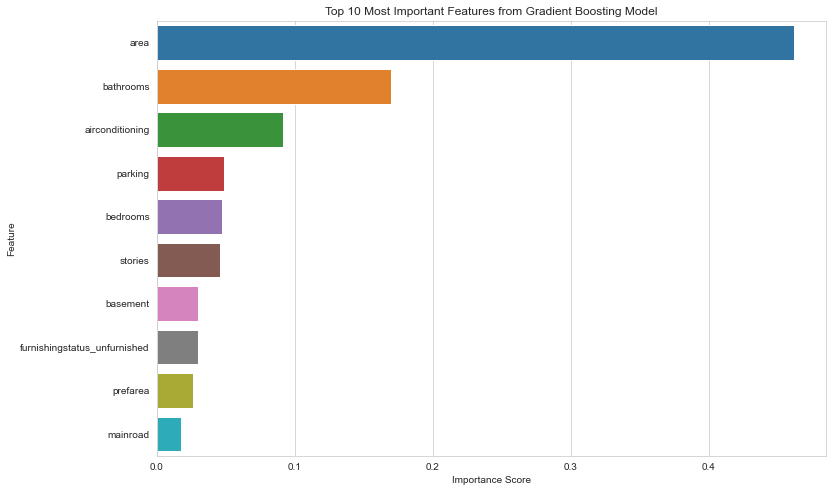

In [63]:
# Extract feature importances from the Gradient Boosting model
feature_importances = gb_default.feature_importances_

# Create a DataFrame to store features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Most Important Features from Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## Recommendation System:

Beyond mere predictions, the project aspires to assist users in understanding house valuations. Enter the recommendation system: a tool that not only suggests a price but also offers insights when user expectations differ from our model's recommendation.

### Objective & Functionality:
The system is designed to take in features of a house and recommend an appropriate selling price. If the user provides an expected price, the system compares it with the recommended one, offering insights into the potential discrepancy.

### Use Case:
A practical application might involve a homeowner considering a sale. By inputting their home's features and expected price, they can gauge if their expectations align with market trends, empowering them to negotiate better or reconsider their valuation.


In [66]:
def refined_recommend_price(features, actual_price=None):

    # Ensure the features are in the same order as the training data
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict the price using Gradient Boosting model
    recommended_price = gb_default.predict(features)[0]
    
    insights = ""
    
    if actual_price:
        difference = actual_price - recommended_price
        top_features = features_df['Feature'].head(3).tolist()  # Extract top 3 influential features
        
        # If the actual price is higher than the recommended price
        if difference > 0:
            insights = (f"The provided price is ${difference:,.2f} higher than the recommended price. "
                        f"This might be influenced by features such as {', '.join(top_features)}.")
        # If the actual price is lower than the recommended price
        elif difference < 0:
            insights = (f"The provided price is ${-difference:,.2f} lower than the recommended price. "
                        f"Typically, features like {', '.join(top_features)} play a significant role in house pricing.")
        else:
            insights = "The provided price matches the recommended price."
    
    return recommended_price, insights

# Test the refined function with a sample input
refined_recommendation, refined_insight = refined_recommend_price(sample_features, sample_actual_price)
refined_recommendation, refined_insight



(5159123.324363916,
 'The provided price is $1,099,123.32 lower than the recommended price. Typically, features like area, bathrooms, airconditioning play a significant role in house pricing.')

## Conclusion & Reflections:

At the outset of this project, we embarked on a journey to predict housing prices using a dataset replete with diverse features. From the intricacies of data preprocessing to the nuances of advanced modeling, each step was undertaken with diligence, ensuring the highest standards of data science practice.

### Key Achievements:

- **Data Understanding & Preprocessing**: A thorough exploration of the dataset was instrumental in understanding its structure, potential challenges, and the relationships between variables. Addressing missing values, encoding categorical variables, and preparing the data set the stage for subsequent analyses.
  
- **Exploratory Data Analysis (EDA)**: The EDA phase unveiled critical insights about our target variable and its interplay with other features. This step not only informed our modeling choices but also enriched our understanding of housing price determinants.

- **Modeling & Evaluation**: Through rigorous model building and evaluation, spanning from basic regression models to advanced ensemble methods, we identified the Gradient Boosting model as the most promising. Its ability to capture complex data relationships and its superior performance metrics underscored its efficacy.

- **Advanced Modeling & Hyperparameter Tuning**: Delving into advanced models added depth to our analysis. The meticulous process of hyperparameter tuning further optimized our models, ensuring they were tailored to our specific dataset.

- **Recommendation System**: Beyond mere predictions, the recommendation system we devised serves as a practical tool for stakeholders in the real estate market. By offering insights and explanations, it bridges the gap between raw predictions and actionable insights.

### Looking Ahead:

While the project has achieved significant milestones, the realm of data science always offers room for enhancement and exploration. Potential future endeavors could encompass:
  
- **Incorporation of Additional Data**: As markets evolve, newer datasets, possibly encompassing more recent sales or additional features, could further refine our predictions.
  
- **Experimentation with Advanced Algorithms**: While Gradient Boosting emerged as a top performer, there's a vast landscape of algorithms to explore, each with its unique strengths.
  
- **Deployment & Real-world Testing**: Turning the model into a web-based application could provide real-world users with instant price predictions, gathering feedback, and iteratively improving the system.

In reflection, this project epitomizes the essence of data science: a blend of technical prowess, analytical thinking, and practical applicability. It stands as a testament to the power of data-driven decision-making in the intricate world of real estate.

